In [1]:
import torch

torch.manual_seed(42)

device_id = 2
using = 0.4
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# torch.cuda.set_per_process_memory_fraction(using, device_id)
# # GPU 메모리 사용 비율 설정
# torch.cuda.empty_cache()
# # 총 메모리가 얼마나 되는지 계산
# total_memory = torch.cuda.get_device_properties(device_id).total_memory
# # GPU 메모리의 49.9% 사용:
# tmp_tensor = torch.empty(int(total_memory * (using-0.001)), dtype=torch.int8, device=device)
# print(f'use:{tmp_tensor}')

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import WeightedRandomSampler

In [2]:
from LoadData import load_data, train_model, show_result

3379
Class: A, Count: 1401
Class: B, Count: 739
Class: C, Count: 695
Class: F, Count: 544
846
Class: A, Count: 351
Class: B, Count: 185
Class: C, Count: 175
Class: F, Count: 135
A  A  A  C  B  F  F  A


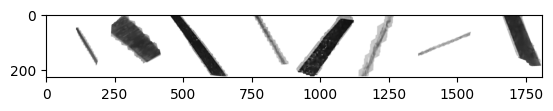

In [3]:
dataloaders_dict = load_data()

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 인라인 이미지 표시를 위한 헬퍼 함수
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # 정규화 해제
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

classes = ('A', 'B', 'C', 'F')
        
dataiter = iter(dataloaders_dict['train'])
images, labels = next(dataiter)

# 이미지를 격자로 생성하고 표시
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(8)))

In [4]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [11]:
use_pretrained= True
net = models.resnet18(pretrained=use_pretrained)

net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
net.fc = nn.Linear(in_features=512, out_features=4, bias=True)

optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
# train_model 함수 실행
num_epochs = 50
result = train_model(net, dataloaders_dict, criterion, optimizer, 
                     num_epochs=num_epochs, save_model='./Model/resnet18.pth',
                     device=device)

Epoch 1/ 50
******************************


  0%|          | 0/106 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 106/106 [00:05<00:00, 20.89it/s]


max val acc:0.24468085106382978, save in ./Model/resnet18.pth
val Loss 1.4007 Acc : 0.2447
Epoch 2/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.64it/s]


train Loss 1.2814 Acc : 0.4386


100%|██████████| 106/106 [00:05<00:00, 20.97it/s]


max val acc:0.47399527186761226, save in ./Model/resnet18.pth
val Loss 1.2267 Acc : 0.4740
Epoch 3/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.75it/s]


train Loss 1.0360 Acc : 0.5673


100%|██████████| 106/106 [00:04<00:00, 21.63it/s]


max val acc:0.5, save in ./Model/resnet18.pth
val Loss 1.0605 Acc : 0.5000
Epoch 4/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.46it/s]


train Loss 0.8753 Acc : 0.6446


100%|██████████| 106/106 [00:05<00:00, 19.96it/s]


max val acc:0.5260047281323877, save in ./Model/resnet18.pth
val Loss 1.5233 Acc : 0.5260
Epoch 5/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.24it/s]


train Loss 0.8106 Acc : 0.6697


100%|██████████| 106/106 [00:05<00:00, 19.90it/s]


max val acc:0.7565011820330969, save in ./Model/resnet18.pth
val Loss 0.6473 Acc : 0.7565
Epoch 6/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.13it/s]


train Loss 0.6501 Acc : 0.7363


100%|██████████| 106/106 [00:05<00:00, 18.80it/s]


val Loss 0.6957 Acc : 0.6915
Epoch 7/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.87it/s]


train Loss 0.5708 Acc : 0.7798


100%|██████████| 106/106 [00:04<00:00, 21.25it/s]


val Loss 1.1959 Acc : 0.6158
Epoch 8/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.71it/s]


train Loss 0.4957 Acc : 0.8062


100%|██████████| 106/106 [00:04<00:00, 22.11it/s]


val Loss 0.8232 Acc : 0.7092
Epoch 9/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.37it/s]


train Loss 0.4083 Acc : 0.8452


100%|██████████| 106/106 [00:04<00:00, 22.13it/s]


max val acc:0.7695035460992907, save in ./Model/resnet18.pth
val Loss 0.6995 Acc : 0.7695
Epoch 10/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 16.96it/s]


train Loss 0.3409 Acc : 0.8662


100%|██████████| 106/106 [00:05<00:00, 19.89it/s]


val Loss 0.8856 Acc : 0.7139
Epoch 11/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.18it/s]


train Loss 0.3166 Acc : 0.8801


100%|██████████| 106/106 [00:05<00:00, 19.06it/s]


val Loss 0.8779 Acc : 0.7329
Epoch 12/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.61it/s]


train Loss 0.2647 Acc : 0.9047


100%|██████████| 106/106 [00:04<00:00, 21.32it/s]


val Loss 0.8068 Acc : 0.7246
Epoch 13/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.79it/s]


train Loss 0.2276 Acc : 0.9121


100%|██████████| 106/106 [00:05<00:00, 19.46it/s]


val Loss 0.7160 Acc : 0.7695
Epoch 14/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.60it/s]


train Loss 0.2480 Acc : 0.9094


100%|██████████| 106/106 [00:05<00:00, 18.92it/s]


max val acc:0.7884160756501182, save in ./Model/resnet18.pth
val Loss 0.6416 Acc : 0.7884
Epoch 15/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.26it/s]


train Loss 0.1846 Acc : 0.9340


100%|██████████| 106/106 [00:04<00:00, 21.69it/s]


max val acc:0.801418439716312, save in ./Model/resnet18.pth
val Loss 0.6535 Acc : 0.8014
Epoch 16/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.23it/s]


train Loss 0.1249 Acc : 0.9553


100%|██████████| 106/106 [00:05<00:00, 18.16it/s]


max val acc:0.8203309692671394, save in ./Model/resnet18.pth
val Loss 0.6116 Acc : 0.8203
Epoch 17/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.80it/s]


train Loss 0.1040 Acc : 0.9651


100%|██████████| 106/106 [00:05<00:00, 20.91it/s]


max val acc:0.8286052009456265, save in ./Model/resnet18.pth
val Loss 0.7117 Acc : 0.8286
Epoch 18/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.47it/s]


train Loss 0.1788 Acc : 0.9376


100%|██████████| 106/106 [00:05<00:00, 20.87it/s]


val Loss 0.8011 Acc : 0.7801
Epoch 19/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.35it/s]


train Loss 0.1227 Acc : 0.9565


100%|██████████| 106/106 [00:05<00:00, 18.16it/s]


val Loss 0.6215 Acc : 0.8168
Epoch 20/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.21it/s]


train Loss 0.0856 Acc : 0.9740


100%|██████████| 106/106 [00:05<00:00, 21.19it/s]


val Loss 1.0025 Acc : 0.7423
Epoch 21/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.26it/s]


train Loss 0.1201 Acc : 0.9574


100%|██████████| 106/106 [00:04<00:00, 21.40it/s]


val Loss 1.0030 Acc : 0.7861
Epoch 22/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 16.99it/s]


train Loss 0.1294 Acc : 0.9550


100%|██████████| 106/106 [00:05<00:00, 18.02it/s]


max val acc:0.8333333333333333, save in ./Model/resnet18.pth
val Loss 0.7164 Acc : 0.8333
Epoch 23/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 16.97it/s]


train Loss 0.0774 Acc : 0.9725


100%|██████████| 106/106 [00:04<00:00, 22.73it/s]


val Loss 0.8491 Acc : 0.7943
Epoch 24/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.11it/s]


train Loss 0.0729 Acc : 0.9772


100%|██████████| 106/106 [00:04<00:00, 22.04it/s]


val Loss 0.7332 Acc : 0.8026
Epoch 25/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.19it/s]


train Loss 0.0598 Acc : 0.9840


100%|██████████| 106/106 [00:05<00:00, 18.67it/s]


val Loss 0.8696 Acc : 0.8203
Epoch 26/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.80it/s]


train Loss 0.0364 Acc : 0.9885


100%|██████████| 106/106 [00:06<00:00, 17.45it/s]


val Loss 0.8165 Acc : 0.8215
Epoch 27/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.58it/s]


train Loss 0.0356 Acc : 0.9917


100%|██████████| 106/106 [00:05<00:00, 19.80it/s]


val Loss 0.8668 Acc : 0.8180
Epoch 28/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 16.95it/s]


train Loss 0.0443 Acc : 0.9861


100%|██████████| 106/106 [00:05<00:00, 20.22it/s]


val Loss 0.8453 Acc : 0.8180
Epoch 29/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.88it/s]


train Loss 0.0291 Acc : 0.9908


100%|██████████| 106/106 [00:06<00:00, 17.20it/s]


val Loss 0.8082 Acc : 0.8310
Epoch 30/ 50
******************************


100%|██████████| 423/423 [00:23<00:00, 18.10it/s]


train Loss 0.0568 Acc : 0.9861


100%|██████████| 106/106 [00:06<00:00, 17.33it/s]


val Loss 0.9126 Acc : 0.7967
Epoch 31/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.76it/s]


train Loss 0.0594 Acc : 0.9781


100%|██████████| 106/106 [00:05<00:00, 20.89it/s]


val Loss 0.9751 Acc : 0.7790
Epoch 32/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.13it/s]


train Loss 0.0551 Acc : 0.9840


100%|██████████| 106/106 [00:05<00:00, 20.50it/s]


val Loss 0.8506 Acc : 0.7967
Epoch 33/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.49it/s]


train Loss 0.0865 Acc : 0.9728


100%|██████████| 106/106 [00:05<00:00, 18.35it/s]


val Loss 0.9035 Acc : 0.8014
Epoch 34/ 50
******************************


100%|██████████| 423/423 [00:23<00:00, 18.31it/s]


train Loss 0.0278 Acc : 0.9899


100%|██████████| 106/106 [00:05<00:00, 18.44it/s]


max val acc:0.8356973995271867, save in ./Model/resnet18.pth
val Loss 0.7206 Acc : 0.8357
Epoch 35/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.88it/s]


train Loss 0.0213 Acc : 0.9944


100%|██████████| 106/106 [00:04<00:00, 21.36it/s]


val Loss 0.8589 Acc : 0.8180
Epoch 36/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 16.94it/s]


train Loss 0.0161 Acc : 0.9953


100%|██████████| 106/106 [00:04<00:00, 24.22it/s]


val Loss 0.8500 Acc : 0.7979
Epoch 37/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.35it/s]


train Loss 0.0234 Acc : 0.9935


100%|██████████| 106/106 [00:05<00:00, 19.24it/s]


val Loss 0.8314 Acc : 0.7979
Epoch 38/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.71it/s]


train Loss 0.0412 Acc : 0.9888


100%|██████████| 106/106 [00:05<00:00, 19.41it/s]


val Loss 0.8579 Acc : 0.7943
Epoch 39/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.09it/s]


train Loss 0.0389 Acc : 0.9885


100%|██████████| 106/106 [00:05<00:00, 18.17it/s]


val Loss 0.9116 Acc : 0.8121
Epoch 40/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.32it/s]


train Loss 0.0449 Acc : 0.9858


100%|██████████| 106/106 [00:05<00:00, 19.94it/s]


val Loss 1.1020 Acc : 0.7955
Epoch 41/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.79it/s]


train Loss 0.0309 Acc : 0.9902


100%|██████████| 106/106 [00:06<00:00, 16.00it/s]


val Loss 0.9826 Acc : 0.8026
Epoch 42/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.63it/s]


train Loss 0.0269 Acc : 0.9917


100%|██████████| 106/106 [00:04<00:00, 21.76it/s]


val Loss 0.7451 Acc : 0.8050
Epoch 43/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.79it/s]


train Loss 0.0129 Acc : 0.9967


100%|██████████| 106/106 [00:05<00:00, 18.88it/s]


val Loss 0.7791 Acc : 0.8168
Epoch 44/ 50
******************************


100%|██████████| 423/423 [00:25<00:00, 16.62it/s]


train Loss 0.0115 Acc : 0.9964


100%|██████████| 106/106 [00:07<00:00, 14.67it/s]


val Loss 0.9575 Acc : 0.8085
Epoch 45/ 50
******************************


100%|██████████| 423/423 [00:19<00:00, 22.05it/s]


train Loss 0.0421 Acc : 0.9870


100%|██████████| 106/106 [00:03<00:00, 28.07it/s]


val Loss 0.9399 Acc : 0.7991
Epoch 46/ 50
******************************


100%|██████████| 423/423 [00:16<00:00, 25.18it/s]


train Loss 0.0463 Acc : 0.9867


100%|██████████| 106/106 [00:03<00:00, 31.67it/s]


val Loss 0.9318 Acc : 0.8073
Epoch 47/ 50
******************************


100%|██████████| 423/423 [00:18<00:00, 23.48it/s]


train Loss 0.0132 Acc : 0.9962


100%|██████████| 106/106 [00:03<00:00, 30.75it/s]


val Loss 0.9748 Acc : 0.8144
Epoch 48/ 50
******************************


100%|██████████| 423/423 [00:16<00:00, 25.39it/s]


train Loss 0.0068 Acc : 0.9985


100%|██████████| 106/106 [00:03<00:00, 31.42it/s]


val Loss 1.1936 Acc : 0.7648
Epoch 49/ 50
******************************


100%|██████████| 423/423 [00:16<00:00, 25.07it/s]


train Loss 0.0107 Acc : 0.9967


100%|██████████| 106/106 [00:03<00:00, 30.70it/s]


val Loss 1.1146 Acc : 0.7801
Epoch 50/ 50
******************************


100%|██████████| 423/423 [00:16<00:00, 25.29it/s]


train Loss 0.0134 Acc : 0.9956


100%|██████████| 106/106 [00:03<00:00, 29.21it/s]

val Loss 1.0979 Acc : 0.7991


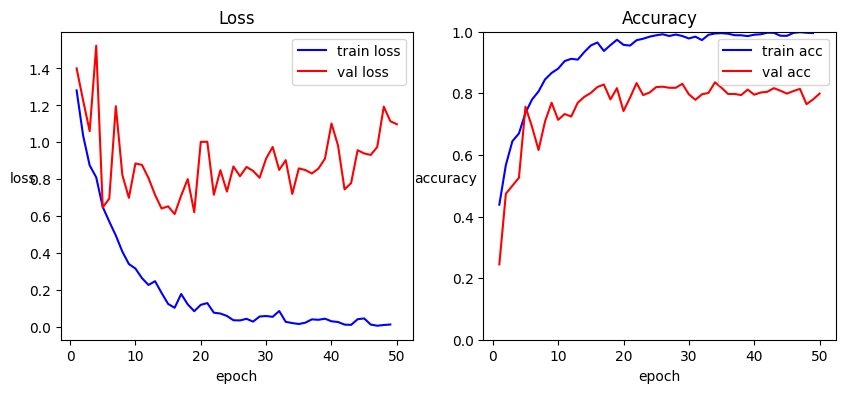

In [12]:
show_result(result)

import json
# 딕셔너리를 JSON 파일로 저장
with open('./Model/resnet18.json', 'w') as f:
    json.dump(result, f)